In [ ]:
!pip install ultralytics opencv-python numpy


  Using cached ultralytics-8.3.108-py3-none-any.whl.metadata (37 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.

In [ ]:
import os
import shutil
from google.colab import files
from ultralytics import YOLO

ModuleNotFoundError: No module named 'ultralytics'

In [ ]:
import torch
print("GPU Available:", torch.cuda.is_available())

GPU Available: True


In [ ]:
dataset_path = "/content/drive/MyDrive/garlic_new"


In [ ]:
train = "/content/drive/MyDrive/garlic_new_cor/train/images"
val ="/content/drive/MyDrive/garlic_new_cor/val/images"

test = "/content/drive/MyDrive/garlic_new_cor/test/images"

print(len(os.listdir(train)))
print(len(os.listdir(val)))
print(len(os.listdir(test)))

2485
534
534


In [ ]:
import os

# Set your directories here
image_dir = '/content/drive/MyDrive/garlic_new/test/images'
label_dir = '/content/drive/MyDrive/garlic_new/test/labels'

# List image and label filenames (without extensions)
image_files = [os.path.splitext(f)[0] for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
label_files = [os.path.splitext(f)[0] for f in os.listdir(label_dir) if f.endswith('.txt')]

# Find mismatches
images_without_labels = [img for img in image_files if img not in label_files]
labels_without_images = [lbl for lbl in label_files if lbl not in image_files]

# Show results
print(f"✅ Total images found: {len(image_files)}")
print(f"✅ Total labels found: {len(label_files)}\n")

if images_without_labels:
    print("⚠️ Images without matching labels:")
    for img in images_without_labels:
        print(f" - {img}")
else:
    print("🎉 All images have corresponding labels.")

if labels_without_images:
    print("\n⚠️ Labels without matching images:")
    for lbl in labels_without_images:
        print(f" - {lbl}")
else:
    print("🎉 All labels have corresponding images.")


✅ Total images found: 533
✅ Total labels found: 533

🎉 All images have corresponding labels.
🎉 All labels have corresponding images.


Train Images:


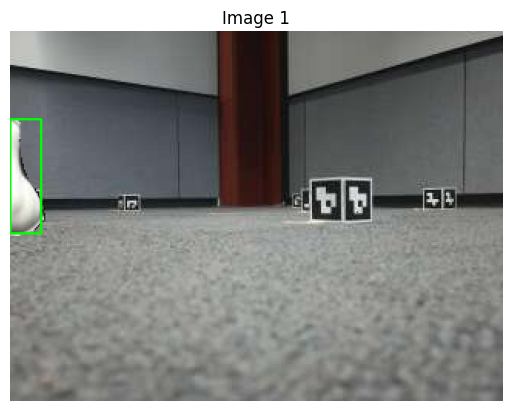

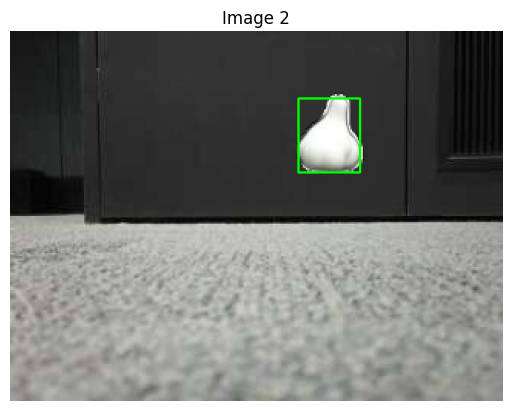

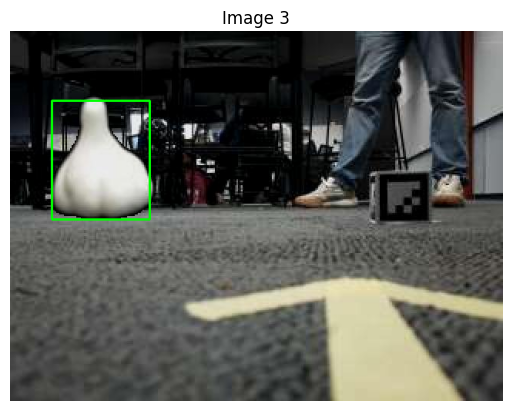

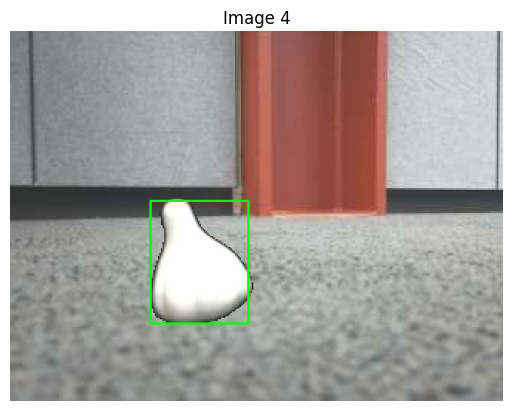

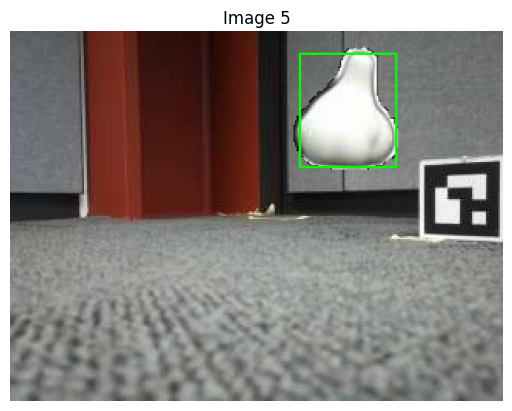


Test Images:


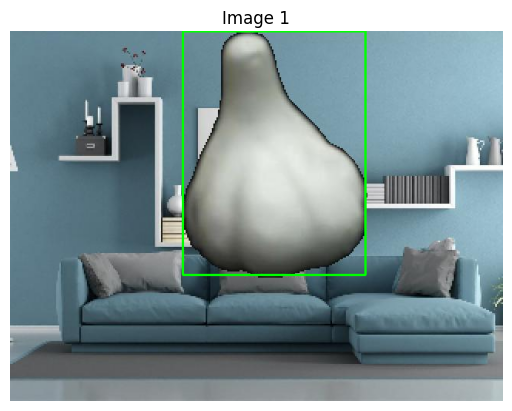

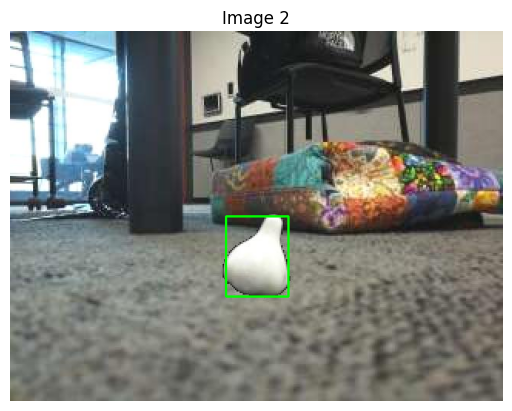

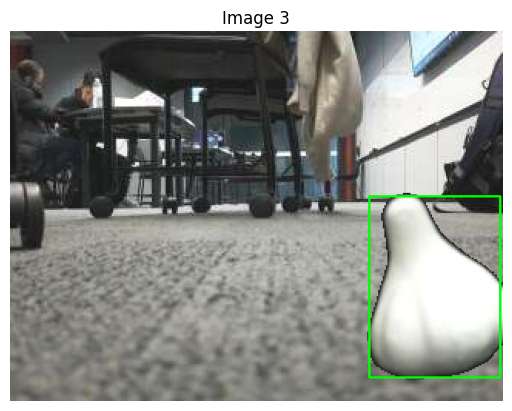

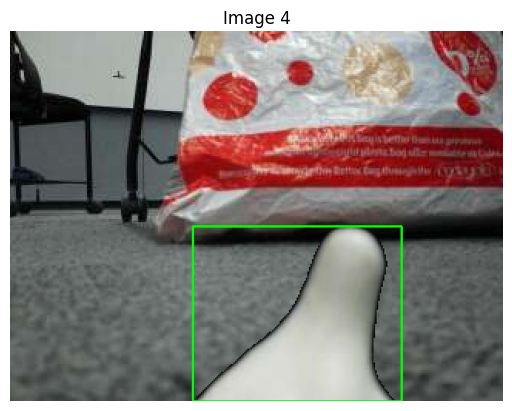

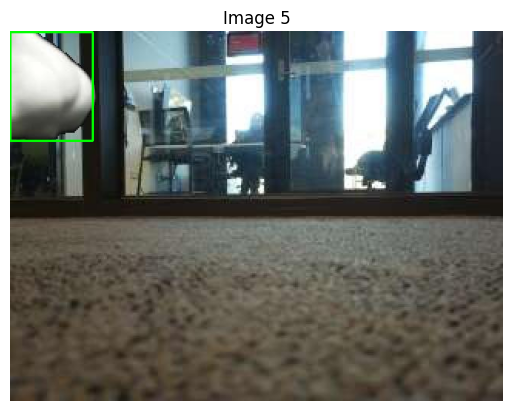

In [ ]:


import matplotlib.pyplot as plt
import cv2
import os

# Define paths to your image and label directories
train_image_dir = '/content/drive/MyDrive/garlic_new/train/images'
train_label_dir = '/content/drive/MyDrive/garlic_new/train/labels'
test_image_dir = '/content/drive/MyDrive/garlic_new/test/images'
test_label_dir = '/content/drive/MyDrive/garlic_new/test/labels'

def plot_images_with_labels(image_dir, label_dir, num_images=5):
    image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]

    for i in range(min(num_images, len(image_files))):
        image_path = os.path.join(image_dir, image_files[i])
        label_path = os.path.join(label_dir, os.path.splitext(image_files[i])[0] + '.txt')

        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                labels = f.readlines()
            for label in labels:
                class_id, x_center, y_center, width, height = map(float, label.strip().split())
                x_min = int((x_center - width / 2) * img.shape[1])
                y_min = int((y_center - height / 2) * img.shape[0])
                x_max = int((x_center + width / 2) * img.shape[1])
                y_max = int((y_center + height / 2) * img.shape[0])

                cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
        else:
            print(f"No label found for image: {image_files[i]}")

        plt.imshow(img)
        plt.title(f"Image {i+1}")
        plt.axis('off')
        plt.show()

print("Train Images:")
plot_images_with_labels(train_image_dir, train_label_dir)

print("\nTest Images:")
plot_images_with_labels(test_image_dir, test_label_dir)


In [ ]:


# Train the YOLO model
model = YOLO('yolov8n.pt') # or choose another model like yolov8s.pt, yolov8m.pt, etc.
model.train(data=yaml_path, epochs=10, imgsz=640) # Adjust epochs and imgsz as needed

custom_model_name = 'my_trained_yolov8.pt'
custom_save_path = os.path.join(dataset_path, custom_model_name)

# (4) Copy the best weights to your dataset folder
best_weights_path = 'runs/detect/train/weights/best.pt'
shutil.copy(best_weights_path, custom_save_path)

100%|██████████| 6.25M/6.25M [00:00<00:00, 283MB/s]

Ultralytics 8.3.108 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/garlic_new/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, optimize=False, int8=False,

100%|██████████| 755k/755k [00:00<00:00, 123MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 218MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/garlic_new/train/labels.cache... 2485 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2485/2485 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/garlic_new/val/labels.cache... 533 images, 1 backgrounds, 0 corrupt: 100%|██████████| 533/533 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.06G     0.4983      1.363     0.8942          5        640: 100%|██████████| 156/156 [14:24<00:00,  5.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.47it/s]

                   all        533        532      0.987      0.993      0.993      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.29G       0.52     0.7479     0.8938          5        640: 100%|██████████| 156/156 [00:48<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.25it/s]


                   all        533        532      0.987      0.996      0.995      0.902

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.29G     0.4952     0.5077     0.8816          5        640: 100%|██████████| 156/156 [00:48<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.26it/s]

                   all        533        532      0.991      0.985      0.994      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.29G     0.4682     0.4103     0.8752          5        640: 100%|██████████| 156/156 [00:49<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.46it/s]

                   all        533        532      0.998          1      0.995      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.29G     0.4348     0.3473     0.8617          5        640: 100%|██████████| 156/156 [00:48<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.37it/s]

                   all        533        532      0.998          1      0.995      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.29G      0.425     0.3111     0.8583          5        640: 100%|██████████| 156/156 [00:49<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.45it/s]

                   all        533        532          1          1      0.995      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.29G     0.4075     0.2965     0.8524          5        640: 100%|██████████| 156/156 [00:49<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.30it/s]

                   all        533        532          1          1      0.995      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.29G     0.3804      0.269     0.8478          5        640: 100%|██████████| 156/156 [00:49<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.40it/s]

                   all        533        532          1          1      0.995      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.29G     0.3694     0.2458     0.8357          5        640: 100%|██████████| 156/156 [00:49<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:04<00:00,  3.47it/s]

                   all        533        532          1          1      0.995      0.956



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.29G     0.3447     0.2253     0.8294          5        640: 100%|██████████| 156/156 [00:49<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.34it/s]

                   all        533        532          1          1      0.995      0.955



10 epochs completed in 0.382 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.108 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:07<00:00,  2.21it/s]


                   all        533        532          1          1      0.995      0.956
Speed: 0.2ms preprocess, 2.2ms inference, 0.0ms loss, 3.5ms postprocess per image
Results saved to runs/detect/train


'/content/drive/MyDrive/garlic_new/my_trained_yolov8.pt'